In [16]:
#import libraries needed
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, silhouette_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
#Read in dataset from umy computer

df = pd.read_csv(r'C:\Users\erinr\OneDrive\Documents\Capstone Project\COVID_Data.csv')

In [3]:
#remove NA values from df 
df.dropna(inplace=True)

In [4]:
#drop country column from dataset
df1=df.drop(['Country' ],axis=1) 

In [5]:
df1.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Severity_Level
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,1
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,1
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,1
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,2
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,2


In [6]:
#define new function called Plotcolumns to create a for loop and create plots for each coluumn in df1
def plotcolumns(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    # Select columns with more than 1 and less than 30 unique values
    df1 = df1[[col for col in df1.columns if 1 < nunique[col] < 30]]
    nRow, nCol = df1.shape
    columnNames = list(df1.columns)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  
    
    #setup a grid of subplots and set formatting 
    plt.figure(figsize=(3 * nGraphPerRow, 5 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    #for each column, based on the data type create either a bar plot or a histogram
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
        
        
   #format the charts  
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

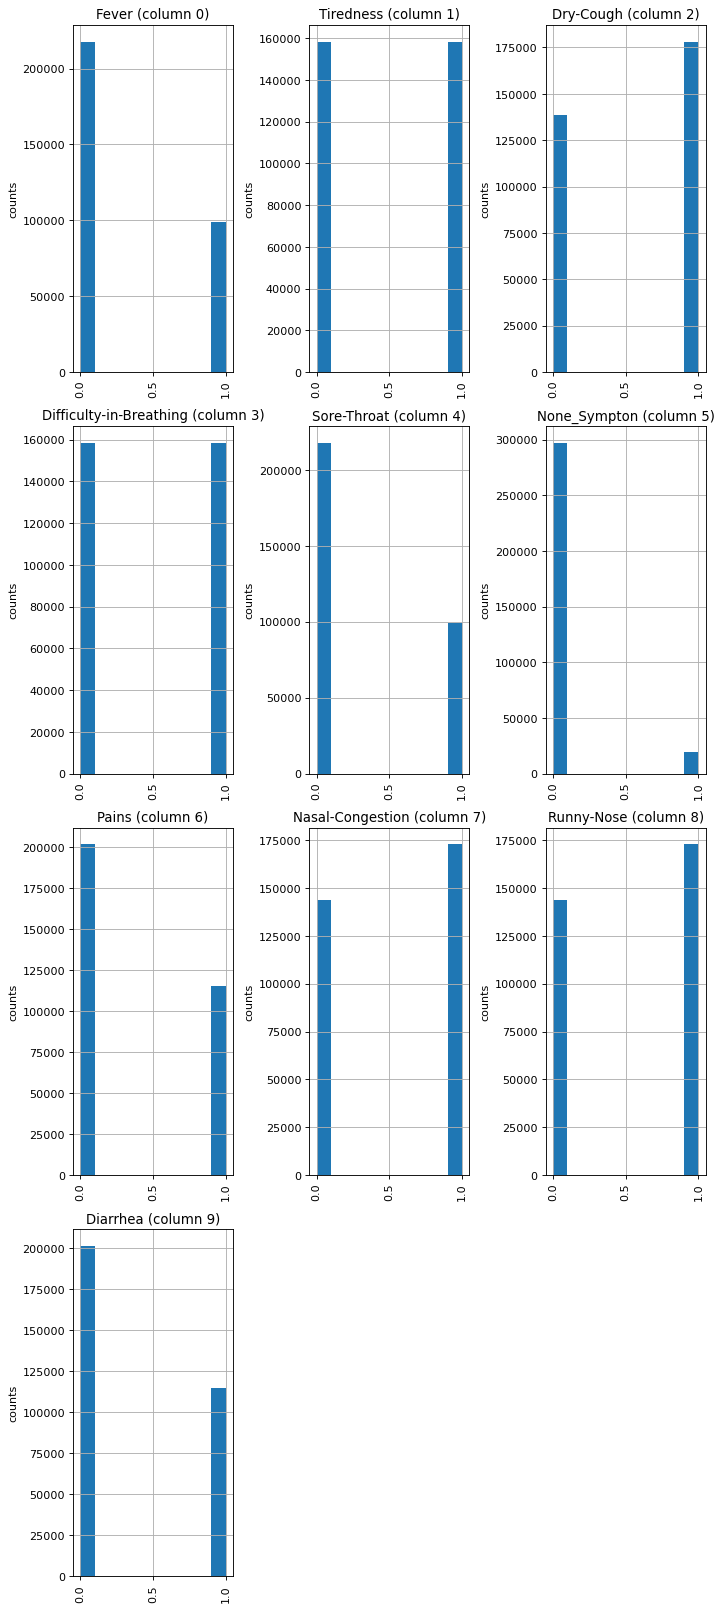

In [7]:
#View the charts 
plotcolumns(df, nGraphShown=10, nGraphPerRow=3)

                                Fever     Tiredness     Dry-Cough  \
Fever                    1.000000e+00  4.045199e-01  5.096472e-02   
Tiredness                4.045199e-01  1.000000e+00  3.779645e-01   
Dry-Cough                5.096472e-02  3.779645e-01  1.000000e+00   
Difficulty-in-Breathing -1.348400e-01  4.629153e-17  3.779645e-01   
Sore-Throat             -1.636364e-01 -1.348400e-01  5.096472e-02   
None_Sympton            -1.740777e-01 -2.581989e-01 -2.927700e-01   
Pains                    2.336708e-17  2.612420e-17  4.519459e-18   
Nasal-Congestion        -8.120278e-17 -6.526807e-17 -5.180861e-17   
Runny-Nose              -1.708735e-16 -1.561936e-16 -9.767619e-17   
Diarrhea                -4.663218e-17 -5.916164e-17 -1.403602e-17   
None_Experiencing       -2.972693e-17 -2.497080e-17 -1.629225e-18   
Age_0-9                  6.959228e-16  4.505202e-16 -1.896458e-17   
Age_10-19                5.727470e-16  8.882113e-17  3.856237e-16   
Age_20-24               -4.855571e

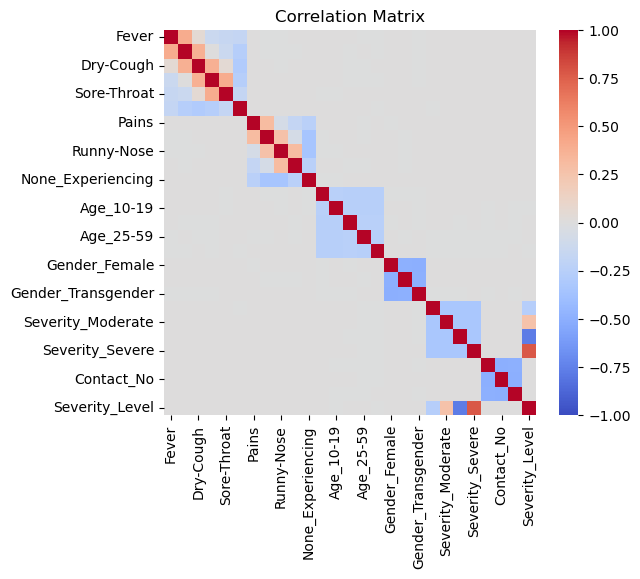

In [8]:
# Compute the correlation matrix, only selecting numeric columns
#firswt time run got error for non-numeric column
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
#drop the severity and country columns from dataset
dfclust=df.drop(['Severity_Mild','Severity_Moderate','Severity_None','Country', 'Gender_Female','Gender_Male','Gender_Transgender','None_Experiencing'],axis=1) 

In [10]:
dfreg = df1

In [11]:
dfclust.head(5)


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Severity_Level
0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1
2,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,2
4,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,2


In [13]:
# Define lists of column names 
#indicators 1 will represent symptoms 
#indicators 2 will be used for modeling the symptoms 
Indicators1 = [ 'Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea' ] 
target_columns = ['Severity_Severe'] 
indicators2 = Indicators1 + target_columns 

# Extract relevant columns from the DataFrame 
features = dfclust[Indicators1] 
targets = dfclust[target_columns] 

# Display the first few rows of the features and targets display
(features.head(), targets.head())


(   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  Pains  \
 0      1          1          1                        1            1      1   
 1      1          1          1                        1            1      1   
 2      1          1          1                        1            1      1   
 3      1          1          1                        1            1      1   
 4      1          1          1                        1            1      1   
 
    Nasal-Congestion  Runny-Nose  Diarrhea  
 0                 1           1         1  
 1                 1           1         1  
 2                 1           1         1  
 3                 1           1         1  
 4                 1           1         1  ,
    Severity_Severe
 0                0
 1                0
 2                0
 3                0
 4                0)

In [17]:
#Define dependant and independant variables 
X = df[Indicators1]

y = df[target_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print the shapes of the train and test sets to verify the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resampling
smote = SMOTE(sampling_strategy='minority', random_state=42)
under = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Create pipeline
steps = [('o', smote), ('u', under), ('m', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps=steps)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# print the shapes of the train and test sets to verify the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (221760, 9), y_train shape: (221760, 1)
X_test shape: (95040, 9), y_test shape: (95040, 1)


C:\ProgramData\anaconda3\lib\site-packages\imblearn\pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


              precision    recall  f1-score   support

           0       0.74      0.46      0.56     71363
           1       0.24      0.52      0.33     23677

    accuracy                           0.47     95040
   macro avg       0.49      0.49      0.45     95040
weighted avg       0.62      0.47      0.51     95040

X_train shape: (221760, 9), y_train shape: (221760, 1)
X_test shape: (95040, 9), y_test shape: (95040, 1)
